<a href="https://colab.research.google.com/github/EBUSYGIN/ML-3/blob/Kuznetsov/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Загрузка данных
train_path = "train.xlsx"
test_path = "test.xlsx"
train_df = pd.read_excel(train_path)
test_df = pd.read_excel(test_path)


In [ ]:
# Преобразование даты в индекс
train_df["dt"] = pd.to_datetime(train_df["dt"])
test_df["dt"] = pd.to_datetime(test_df["dt"])
train_df.set_index("dt", inplace=True)
test_df.set_index("dt", inplace=True)



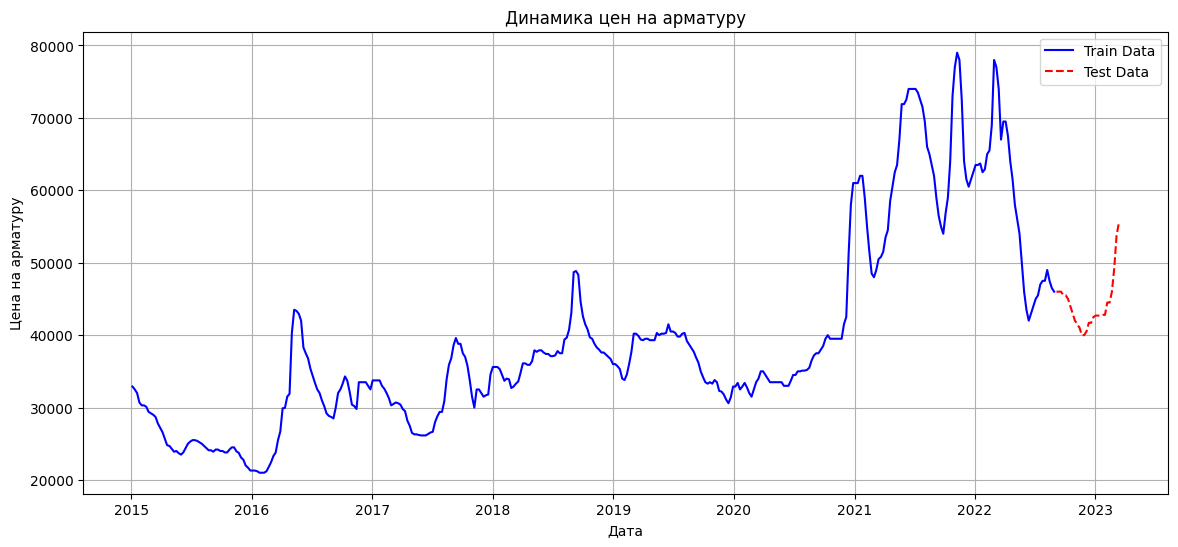

In [ ]:
# Визуализация временного ряда
plt.figure(figsize=(14, 6))
plt.plot(train_df.index, train_df["Цена на арматуру"], label="Train Data", color='blue')
plt.plot(test_df.index, test_df["Цена на арматуру"], label="Test Data", color='red', linestyle='dashed')
plt.xlabel("Дата")
plt.ylabel("Цена на арматуру")
plt.title("Динамика цен на арматуру")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Создание признаков
train_df["timestamp"] = train_df.index.astype(np.int64) // 10**9
test_df["timestamp"] = test_df.index.astype(np.int64) // 10**9

In [ ]:
# Разделение на признаки и целевую переменную
X_train, y_train = train_df[["timestamp"]], train_df["Цена на арматуру"]
X_test, y_test = test_df[["timestamp"]], test_df["Цена на арматуру"]

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Прогнозирование
predictions = model.predict(X_test)

Linear Regression MAE: 14317.609095213087, MSE: 216620929.17947572, RMSE: 14718.047736689663, MAPE: 33.099614988446504, SMAPE: 28.10689816273271


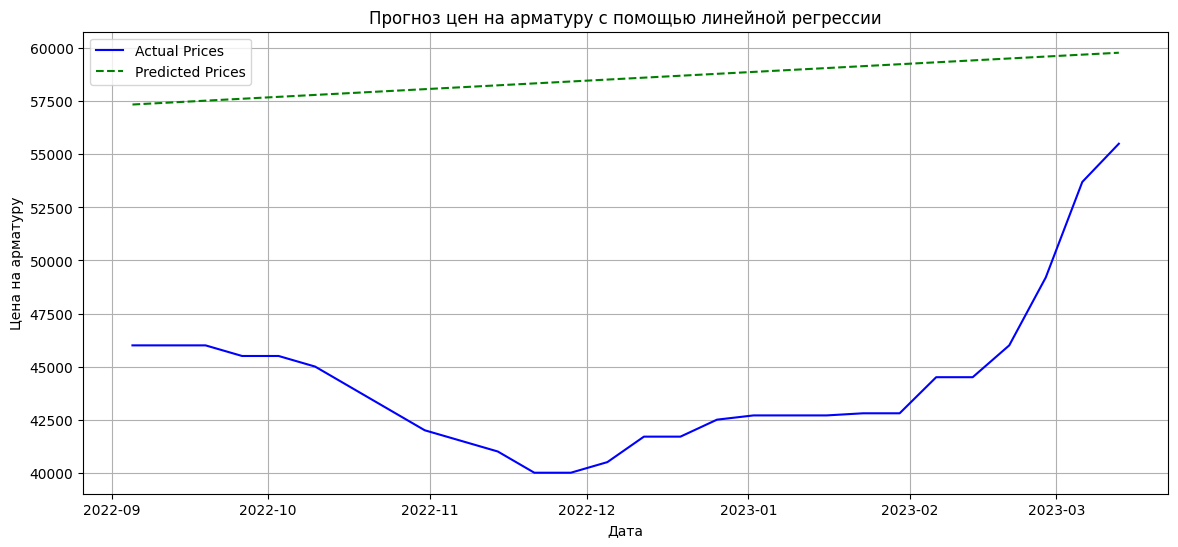

In [ ]:
# Оценка модели
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
smape = 100 * np.mean(2 * np.abs(predictions - y_test) / (np.abs(predictions) + np.abs(y_test)))

print(f"Linear Regression MAE: {mae}, MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, SMAPE: {smape}")

# Визуализация прогнозов
plt.figure(figsize=(14, 6))
plt.plot(test_df.index, y_test, label="Actual Prices", color='blue')
plt.plot(test_df.index, predictions, label="Predicted Prices", color='green', linestyle='dashed')
plt.xlabel("Дата")
plt.ylabel("Цена на арматуру")
plt.title("Прогноз цен на арматуру с помощью линейной регрессии")
plt.legend()
plt.grid()
plt.show()
